# Check Atmospheric profiles
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- date : November 27th 2018
- update : November 7th 2023
- Last update : June 14th 2025 (ZTF and VLT)
- Last update : October 17th 2025 : use getObsAtmo ( v0.2.2)

These curves indicates the atmospheric model in libradtran is compatible with
analytical physical formula. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd

In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
#from astropy.io import fits

In [5]:
from getObsAtmo import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures,Dict_Of_sitesMoleculesNDensity,Dict_Of_sitesAirWeight  

In [6]:
from atmanalyticalmodels import libatmscattering as ray
#from analyticalmodels import N_A,R,M_air
N_A=6.0221409e23  # mol-1
M_air= 28.965338*1e-3  # u.g/u.mol  (kg/mol)
m_air = M_air/N_A # single air molecule mass in grams

In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Configuration

### Average air molecule mass


| Gaz                | Symbole | Pourcentage molaire | Masse molaire (g/mol) |
| ------------------ | ------- | ------------------- | --------------------- |
| Azote              | N₂      | 78,08 %             | 28,0134               |
| Oxygène            | O₂      | 20,95 %             | 31,9988               |
| Argon              | Ar      | 0,93 %              | 39,948                |
| Dioxyde de carbone | CO₂     | 0,04 % (ou 400 ppm) | 44,0095               |


$M_{\text{air}} = (0{,}7808 \times 28{,}0134) + (0{,}2095 \times 31{,}9988) + (0{,}0093 \times 39{,}948) + (0{,}0004 \times 44{,}0095)$

$M_{air}​\simeq 21,87+6,71+0,37+0,018≈28,97 g/mol$

Number of mass molecule in one mole

$N_A = 6.022 \times 10^{23}$ molecules in 1 mol

📌 Résumé
Masse molaire moyenne de l’air sec : 28,97 g/mol

Masse d’une molécule d’air : $ m = \frac{M_{air}}{N_A} \sim 4{,}81 \times 10^{-26}\ kg$



In [8]:
airmoleculemeanweight_kg = 4.81e-26 # kg per molecule
airmoleculemeanweight_g = 4.81e-23 # g per molecule
cm3tom3 = 1e6
dict2 = Dict_Of_sitesAltitudes
dict1 = Dict_Of_sitesPressures
dict3 = Dict_Of_sitesMoleculesNDensity 
list_Of_sitesTags = [ 'OMK', 'PDM', 'LSST','VLT','CTIO','ZTF' ,'OHP', 'OSL']
list_Of_sitesNames = ['Mauna Kea', 'Pic du Midi','Rubin-LSST','VLT','CTIO','Palomar Mount','OHP','Sea Level']
List_Of_sitesPressures = [ dict1[sitetag] for sitetag in list_Of_sitesTags]
List_Of_sitesAltitudes = [ dict2[sitetag] for sitetag in list_Of_sitesTags]
List_Of_sitesAirNDensity = [ dict3[sitetag] for sitetag in list_Of_sitesTags] # number of molecules per cm3
List_Of_siteMassDensity = [ dict3[sitetag]*airmoleculemeanweight_kg*cm3tom3  for sitetag in list_Of_sitesTags] # number of molecules per cm3
NSites = len(list_Of_sitesTags)

In [9]:
List_Of_siteMassDensity 

[0.8015576400000001,
 0.9193160600000001,
 0.9408215700000001,
 0.94350555,
 0.9854583700000001,
 1.03563148,
 1.14986417,
 1.22453942]

In [10]:
#List_Of_siteMassDensity = [ n*m_air*1e6 for n in List_Of_sitesAirNDensity]

In [11]:
lsst_altitude = 2.663 #km
lsst_pressure = 743 # hPa

## airmass

In [12]:
z_airmass=1.0

In [13]:
all_airmass=np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5,1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.5])

In [14]:
NBSIMU=all_airmass.shape[0]

## Seasons

In [15]:
#YEARSTR="2018"

### Winter

In [16]:
pwv_w=10.2
o3_w=370.1
P_w=932.8
aer_w=0

### Summer

In [17]:
pwv_s=25.1
o3_s=318.1
P_s=938.9
aer_s=0

## Altitude vs Pressure

In [18]:
altitudes=np.linspace(0.,10000.,5000)
press=ray.Pressure_adiabatic(altitudes)
press=press/100.

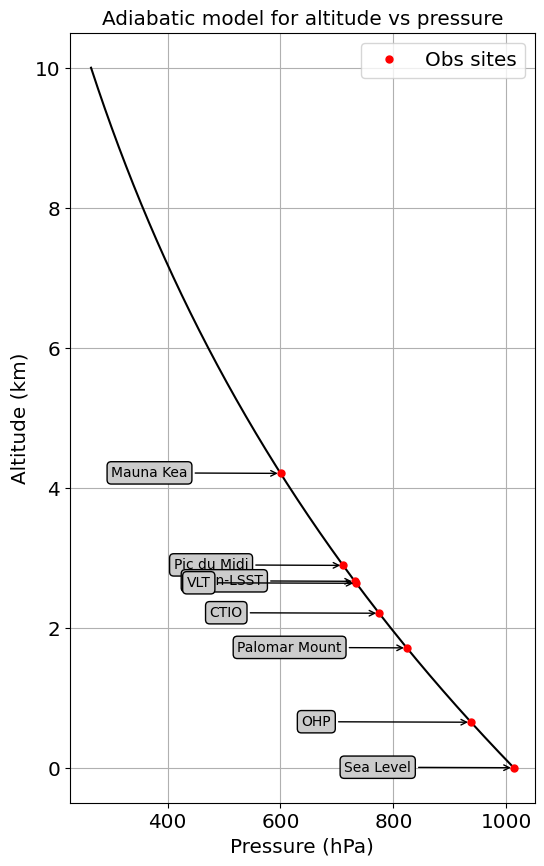

In [19]:
bbox = dict(boxstyle="round", fc="0.8")
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(facecolor='black',arrowstyle="->")
    #connectionstyle="angle,angleA=0,angleB=90,rad=10")


plt.figure(figsize=(6,10))
plt.title("Adiabatic model for altitude vs pressure")
figname="AtmModel.png"
plt.plot(press,altitudes/1000,'k-')
plt.plot(List_Of_sitesPressures,List_Of_sitesAltitudes,'or',ms=5,label="Obs sites")

for idx in range(NSites): 
    pointed = (List_Of_sitesPressures[idx],List_Of_sitesAltitudes[idx])
    point_text = (List_Of_sitesPressures[idx]-300,List_Of_sitesAltitudes[idx]-0.05)
    #plt.annotate(list_Of_sitesNames[idx], xy=pointed, xytext=point_text,
    #        arrowprops=dict(facecolor='black', shrink=0.01),
    #        )
    plt.annotate(list_Of_sitesNames[idx], xy=pointed, xytext=point_text,bbox=bbox, arrowprops=arrowprops)

plt.xlabel("Pressure (hPa)")
plt.ylabel("Altitude (km)")
#plt.axhline(lsst_altitude,color="red")
#plt.axvline(lsst_pressure,color="red")
plt.legend()
plt.grid()
plt.savefig(figname)

## Altitude vs density

- L'air humide est moins lourd (dense) que l'air sec

In [20]:
T=273+20.
Hr=0.9
mass_density=ray.MassDensity_adiabatic(altitudes,T)
mass_density_h=ray.MassDensity_adiabatic_humid(altitudes,Hr,T)
kgm3_to_gl=1

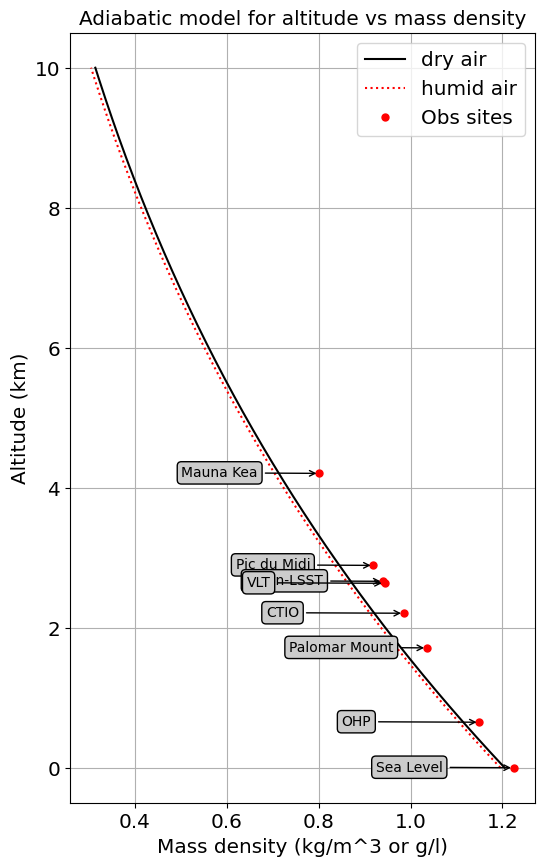

In [21]:
plt.figure(figsize=(6,10))
plt.title("Adiabatic model for altitude vs mass density")
figname="AirMassDensity.png"
plt.plot(mass_density,altitudes/1000,'k-',label='dry air')
plt.plot(mass_density_h,altitudes/1000,'r:',label='humid air')

plt.plot(List_Of_siteMassDensity,List_Of_sitesAltitudes,'or',ms=5,label="Obs sites")


# Not understood
for idx in range(NSites): 
    pointed = (List_Of_siteMassDensity[idx],List_Of_sitesAltitudes[idx])
    point_text = (List_Of_siteMassDensity[idx]-0.3,List_Of_sitesAltitudes[idx]-0.05)
    plt.annotate(list_Of_sitesNames[idx], xy=pointed, xytext=point_text,bbox=bbox, arrowprops=arrowprops)

plt.xlabel("Mass density (kg/m^3 or g/l)")
plt.ylabel("Altitude (km)")
plt.legend()
plt.grid()
plt.savefig(figname)